In [28]:
import pandas as pd

df = pd.read_csv("ames.csv")

features = [
    "Gr.Liv.Area", "Garage.Area", "Total.Bsmt.SF", "Year.Built", "Year.Remod.Add",
    "Full.Bath", "Fireplaces", "TotRms.AbvGrd", "Lot.Area", "Garage.Cars",
    "MS.Zoning", "Neighborhood", "House.Style", "Exter.Qual", "Kitchen.Qual",
    "SalePrice"
]
df_new = df[features]
df_new

,Gr.Liv.Area,Garage.Area,Total.Bsmt.SF,Year.Built,Year.Remod.Add,Full.Bath,Fireplaces,TotRms.AbvGrd,Lot.Area,Garage.Cars,MS.Zoning,Neighborhood,House.Style,Exter.Qual,Kitchen.Qual,SalePrice
0,1656,528.0,1080.0,1960,1960,1,2,7,31770,2.0,RL,NAmes,1Story,TA,TA,215000
1,896,730.0,882.0,1961,1961,1,0,5,11622,1.0,RH,NAmes,1Story,TA,TA,105000
2,1329,312.0,1329.0,1958,1958,1,0,6,14267,1.0,RL,NAmes,1Story,TA,Gd,172000
3,2110,522.0,2110.0,1968,1968,2,2,8,11160,2.0,RL,NAmes,1Story,Gd,Ex,244000
4,1629,482.0,928.0,1997,1998,2,1,6,13830,2.0,RL,Gilbert,2Story,TA,TA,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,1003,588.0,1003.0,1984,1984,1,0,6,7937,2.0,RL,Mitchel,SLvl,TA,TA,142500
2926,902,484.0,864.0,1983,1983,1,0,5,8885,2.0,RL,Mitchel,1Story,TA,TA,131000
2927,970,0.0,912.0,1992,1992,1,0,6,10441,0.0,RL,Mitchel,SFoyer,TA,TA,132000
2928,1389,418.0,1389.0,1974,1975,1,1,6,10010,2.0,RL,Mitchel,1Story,TA,TA,170000


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
from scipy.stats import randint, uniform, ttest_rel
warnings.filterwarnings('ignore') 

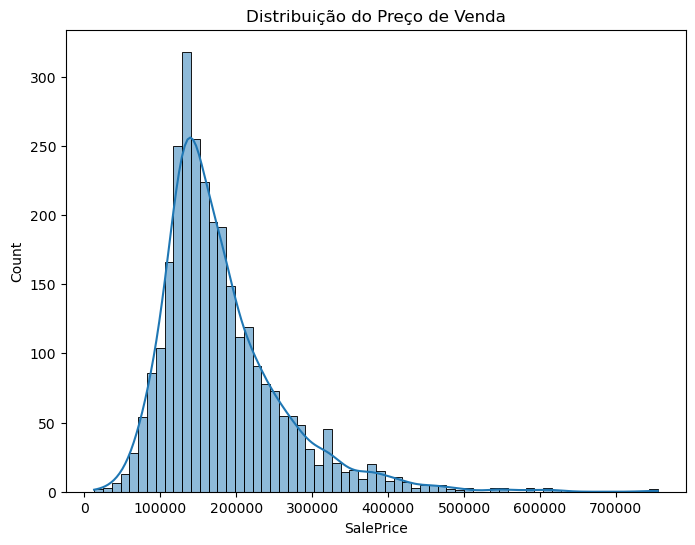

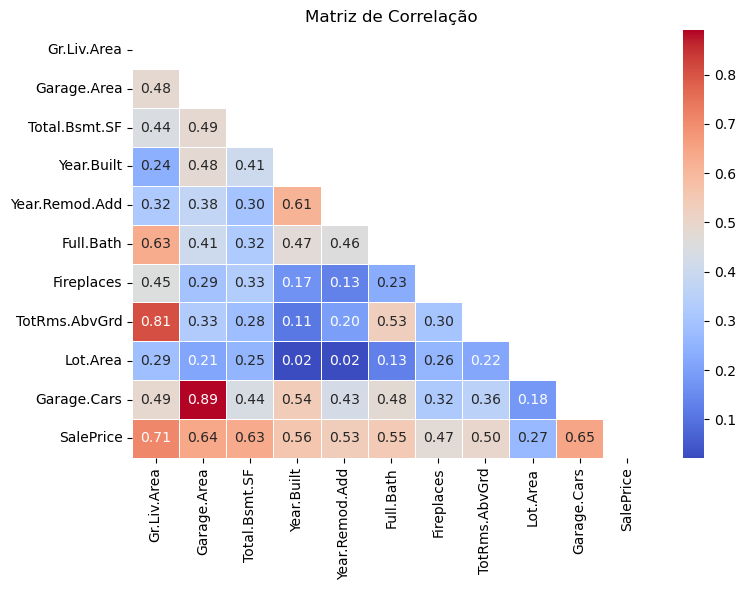

In [30]:
# Distribuição do preço de venda
plt.figure(figsize=(8, 6))
sns.histplot(df_new['SalePrice'], kde=True)
plt.title('Distribuição do Preço de Venda')
plt.show()

# Matriz de correlação para variáveis numéricas
numeric_columns = df_new.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df_new[numeric_columns].corr()
plt.figure(figsize=(8, 6))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidth=0.5)
plt.title('Matriz de Correlação')
plt.tight_layout()
plt.show()

**Observações sobre a Distribuição do Preço de Venda (`SalePrice`):**

*   O histograma do `SalePrice` mostra uma **assimetria positiva (à direita)**. Isso significa que a maioria das casas tem preços concentrados na faixa mais baixa, mas existem algumas casas com preços significativamente mais altos que "esticam" a cauda da distribuição para a direita.
*   Essa assimetria pode ser problemática para alguns modelos de regressão (especialmente os lineares) que assumem normalidade dos resíduos. A transformação logarítmica da variável alvo, que você aplicou posteriormente (`LogSalePrice` na Célula 7), é uma boa prática para lidar com isso, tornando a distribuição mais simétrica.

**Observações sobre a Matriz de Correlação:**

*   A matriz de correlação mostra as relações lineares entre as variáveis numéricas. Focando nas correlações com `SalePrice`:
    *   **`Gr.Liv.Area` (Área de Estar Acima do Nível do Solo):** Apresenta a maior correlação positiva com `SalePrice` (0.71, conforme a Célula 4). Isso é esperado, pois casas maiores tendem a ser mais caras.
    *   **`Garage.Cars` (Capacidade da Garagem em Carros) e `Garage.Area` (Área da Garagem):** Ambas mostram correlações positivas fortes (0.65 e 0.64, respectivamente). Isso sugere que o tamanho e a capacidade da garagem são importantes para o preço. Note que `Garage.Cars` e `Garage.Area` são altamente correlacionadas entre si (0.89), o que é natural.
    *   **`Total.Bsmt.SF` (Área Total do Porão):** Tem uma correlação positiva considerável (0.63).
    *   **`Year.Built` (Ano de Construção):** Mostra uma correlação positiva moderada (0.56), indicando que casas mais novas tendem a ter preços mais altos.
*   Há outras correlações positivas moderadas, como `Full.Bath` (Banheiros completos) e `TotRms.AbvGrd` (Total de cômodos acima do nível do solo), que também fazem sentido intuitivo.
*   Correlações negativas muito fortes não são evidentes com `SalePrice` nesta seleção de features numéricas.

Top 5 correlações com o preço de venda:
SalePrice        1.000000
Gr.Liv.Area      0.706780
Garage.Cars      0.647877
Garage.Area      0.640401
Total.Bsmt.SF    0.632280
Year.Built       0.558426
Name: SalePrice, dtype: float64


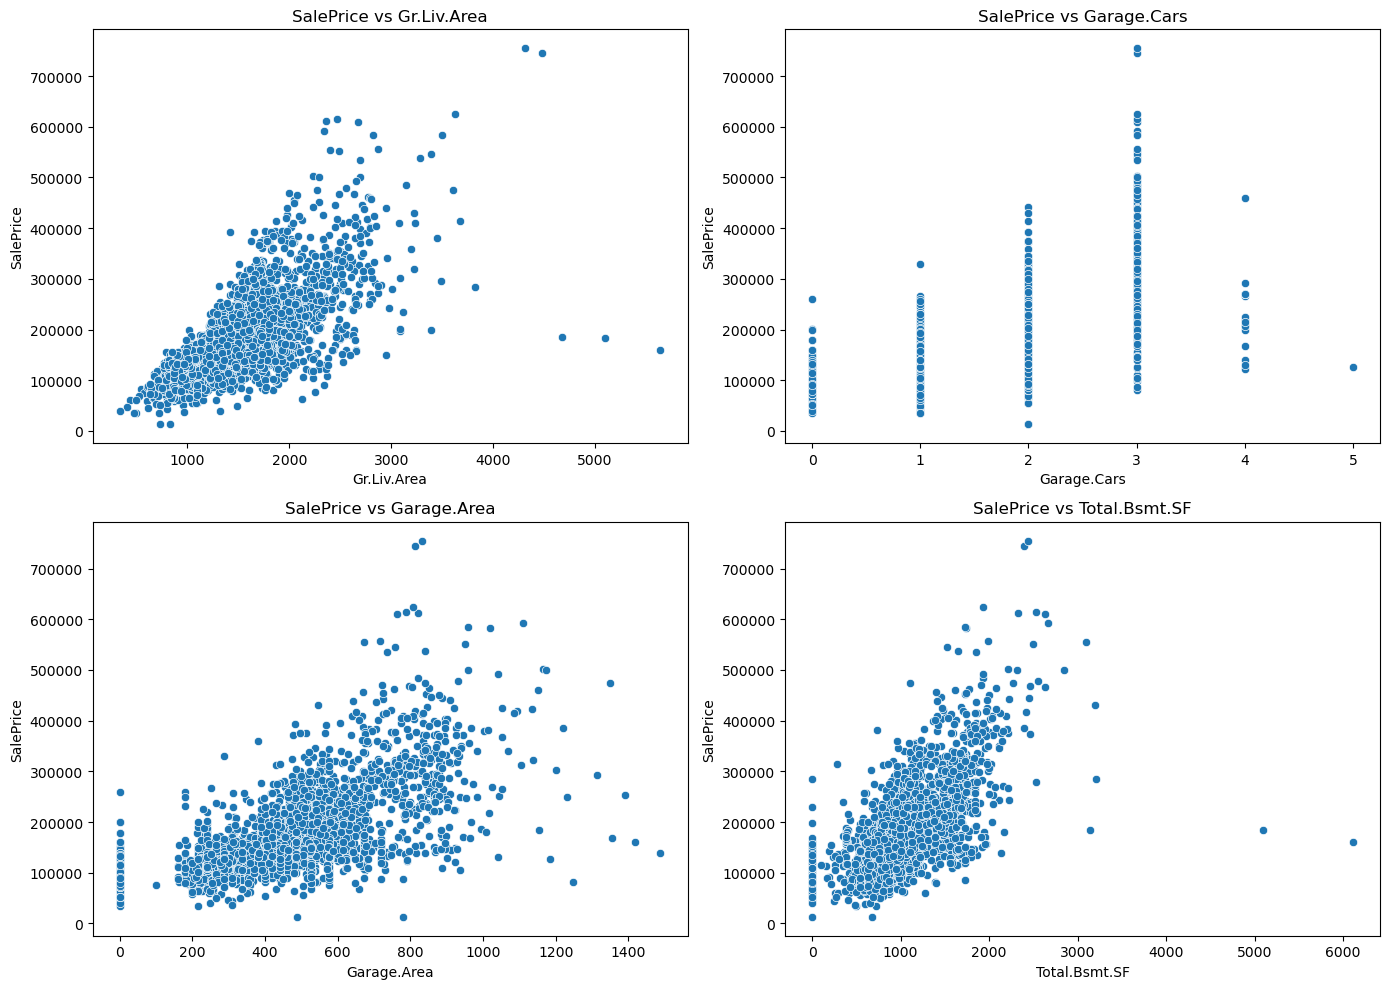

In [31]:
# Top 5 correlações com o preço de venda
price_corr = corr_matrix['SalePrice'].sort_values(ascending=False)
print("Top 5 correlações com o preço de venda:")
print(price_corr.head(6))

# Gráficos de dispersão para os principais recursos numéricos
top_num_features = price_corr.index[1:6]
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, feature in enumerate(top_num_features[:4]):
    sns.scatterplot(x=feature, y='SalePrice', data=df_new, ax=axes[i])
    axes[i].set_title(f'SalePrice vs {feature}')

plt.tight_layout()
plt.show()

**Observações sobre os Gráficos de Dispersão (Features Numéricas vs. `SalePrice`):**

*   **`Gr.Liv.Area` vs `SalePrice`:**
    *   Confirma a **forte relação linear positiva** (correlação de 0.71) observada na matriz de correlação da Célula 3. À medida que a área de estar acima do nível do solo (`Gr.Liv.Area`) aumenta, o preço de venda (`SalePrice`) tende a aumentar.
    *   A dispersão dos pontos (variabilidade do `SalePrice`) parece aumentar para valores mais altos de `Gr.Liv.Area`. Isso indica que para casas maiores, outros fatores podem ter uma influência mais pronunciada na variação do preço.
    *   Alguns outliers são visíveis, especialmente as duas casas com `Gr.Liv.Area` acima de 4000 ft² e preços relativamente baixos para essa área, que foram corretamente identificadas e tratadas na Célula 7.

*   **`Garage.Area` vs `SalePrice`:**
    *   A área da garagem (`Garage.Area`) demonstra uma **relação positiva clara** com `SalePrice` (correlação de 0.64).
    *   Há uma concentração de casas sem garagem (`Garage.Area` = 0) na faixa de preços mais baixos, o que é intuitivo.
    *   A variabilidade do `SalePrice` também tende a aumentar conforme a `Garage.Area` cresce.
    *   Existem alguns pontos com área de garagem grande (acima de 1200 ft²) que não necessariamente seguem a tendência de preços muito mais altos, sugerindo um possível ponto de saturação ou a influência de outras variáveis.

*   **`Total.Bsmt.SF` (Área Total do Porão) vs `SalePrice`:**
    *   A área total do porão (`Total.Bsmt.SF`) também exibe uma **relação positiva** com `SalePrice` (correlação de 0.63).
    *   Casas sem porão (`Total.Bsmt.SF` = 0) geralmente estão concentradas na faixa de preços mais baixos.
    *   Similarmente a `Gr.Liv.Area`, a dispersão do `SalePrice` aumenta com o aumento da `Total.Bsmt.SF`.
    *   Existem alguns outliers, como a casa com mais de 6000 ft² de porão que tem um preço de venda que não reflete proporcionalmente essa grande área, e algumas casas com porões grandes e preços mais modestos.

*   **`Year.Built` (Ano de Construção) vs `SalePrice`:**
    *   O gráfico mostra uma **tendência positiva**, onde casas mais recentes (`Year.Built` maior) tendem a ter preços de venda mais altos (correlação de 0.56).
    *   No entanto, a relação não é estritamente linear e há uma grande dispersão dos preços, especialmente para casas construídas após 1940. Isso indica que o ano de construção, embora influente, não é o único fator; a qualidade da construção, reformas (`Year.Remod.Add`) e outras características são certamente importantes.
    *   Casas muito antigas (antes de 1900) tendem a ter preços mais baixos, mas com alguns exemplares de preços mais elevados, possivelmente devido a valor histórico ou reformas significativas.

**Conclusão Parcial dos Gráficos de Dispersão:**
As features de área (`Gr.Liv.Area`, `Garage.Area`, `Total.Bsmt.SF`) mostram relações positivas diretas e significativas com o preço de venda. O ano de construção também indica uma tendência positiva, mas com maior variabilidade, sugerindo a importância de outras features relacionadas à idade e condição do imóvel. A transformação logarítmica do `SalePrice` (realizada na Célula 7) provavelmente ajudará a linearizar algumas dessas relações e a estabilizar a variância dos resíduos nos modelos subsequentes.

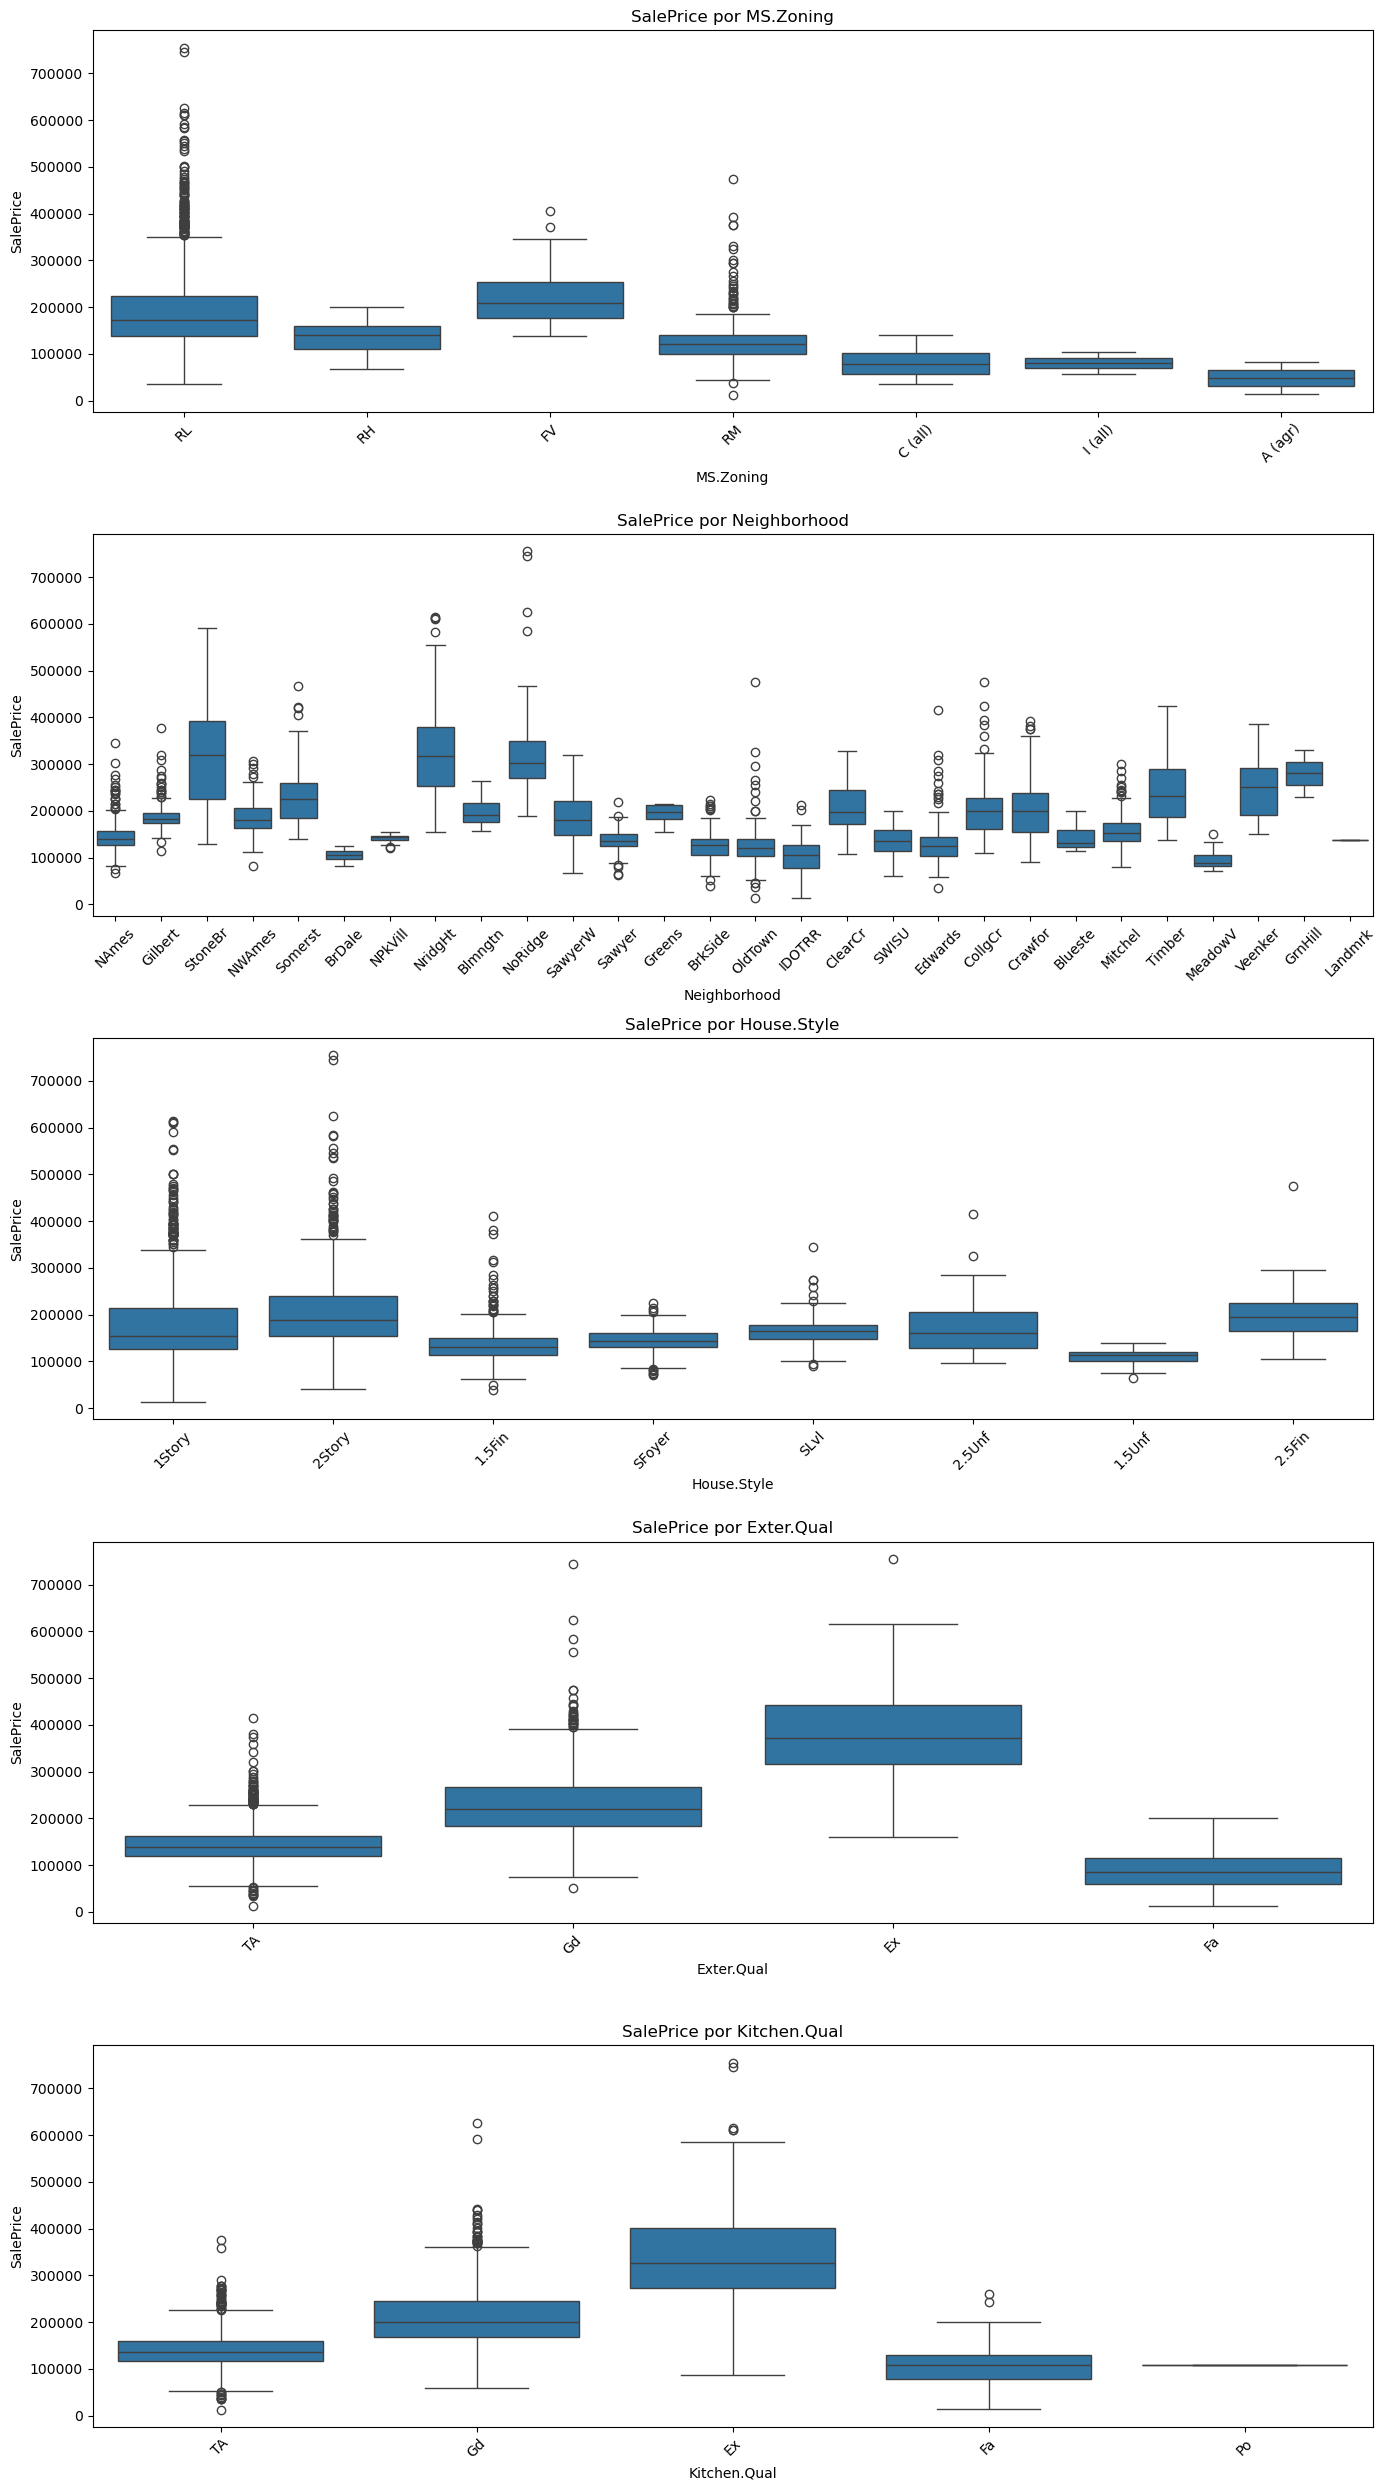

In [32]:
# Célula 4: Análise de Variáveis Categóricas
cat_features = df_new.select_dtypes(include=['object']).columns
fig, axes = plt.subplots(len(cat_features), 1, figsize=(14, 5*len(cat_features)))

for i, feature in enumerate(cat_features):
    sns.boxplot(x=feature, y='SalePrice', data=df_new, ax=axes[i])
    axes[i].set_title(f'SalePrice por {feature}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Observações sobre os Boxplots (Features Categóricas vs. `SalePrice`):**

*   **`MS.Zoning` (Classificação da Zona):**
    *   Diferentes zonas apresentam distribuições de preço distintas. Por exemplo, 'FV' (Floating Village Residential) e 'RL' (Residential Low Density) tendem a ter preços medianos mais altos em comparação com 'C (all)' (Commercial) ou 'RH' (Residential High Density).
*   **`Neighborhood` (Vizinhança):**
    *   Esta feature mostra uma variação considerável nos preços. Vizinhanças como 'NridgHt', 'NoRidge', 'StoneBr' apresentam preços medianos significativamente mais altos do que bairros como 'MeadowV', 'IDOTRR', 'BrDale'. Isso indica que a localização (vizinhança) é um fator muito importante.
*   **`House.Style` (Estilo da Moradia):**
    *   Estilos como '2.5Fin' (2 andares e meio, finalizado) e '2Story' (2 andares) tendem a ter preços medianos mais elevados do que '1.5Unf' (1 andar e meio, não finalizado) ou 'SFoyer' (Split Foyer).
*   **`Exter.Qual` (Qualidade do Material Externo) e `Kitchen.Qual` (Qualidade da Cozinha):**
    *   Ambas as features mostram uma clara tendência: quanto melhor a qualidade (Ex > Gd > TA > Fa), maior o preço mediano da casa. Isso é esperado e sugere que são bons preditores.
    *   'Exter.Qual' tem uma mediana mais alta para 'Ex' (Excelente) do que 'Kitchen.Qual' para 'Ex', mas ambas seguem o padrão.

**Conclusão Parcial da Análise Categórica:**
As features categóricas selecionadas, especialmente `Neighborhood`, `Exter.Qual` e `Kitchen.Qual`, parecem ter um impacto discriminatório forte no `SalePrice`.

In [33]:
# Célula 5: Verificação de Dados Faltantes
missing_data = df_new.isnull().sum()
missing_percent = (missing_data / len(df_new)) * 100
missing_df = pd.DataFrame({'Missing Count': missing_data, 'Percent': missing_percent})
print("Dados faltantes:")
print(missing_df[missing_df['Missing Count'] > 0])

Dados faltantes:
               Missing Count  Percent
Garage.Area                1  0.03413
Total.Bsmt.SF              1  0.03413
Garage.Cars                1  0.03413


**Observações sobre Dados Faltantes:**

*   Apenas três features da nossa seleção apresentam dados faltantes:
    *   `Garage.Area`: 1 valor faltante (0.03%)
    *   `Total.Bsmt.SF`: 1 valor faltante (0.03%)
    *   `Garage.Cars`: 1 valor faltante (0.03%)
*   A quantidade de dados faltantes é mínima.
*   Para essas features numéricas, a imputação pela mediana (como planejado no pipeline de pré-processamento) é uma estratégia robusta e adequada, pois a mediana é menos sensível a outliers do que a média.

Outliers em Gr.Liv.Area: 75 (2.56%)
Outliers em Garage.Area: 42 (1.43%)
Outliers em Total.Bsmt.SF: 123 (4.20%)
Outliers em Year.Built: 9 (0.31%)
Outliers em Full.Bath: 4 (0.14%)
Outliers em Fireplaces: 13 (0.44%)
Outliers em TotRms.AbvGrd: 51 (1.74%)
Outliers em Lot.Area: 127 (4.33%)
Outliers em Garage.Cars: 17 (0.58%)


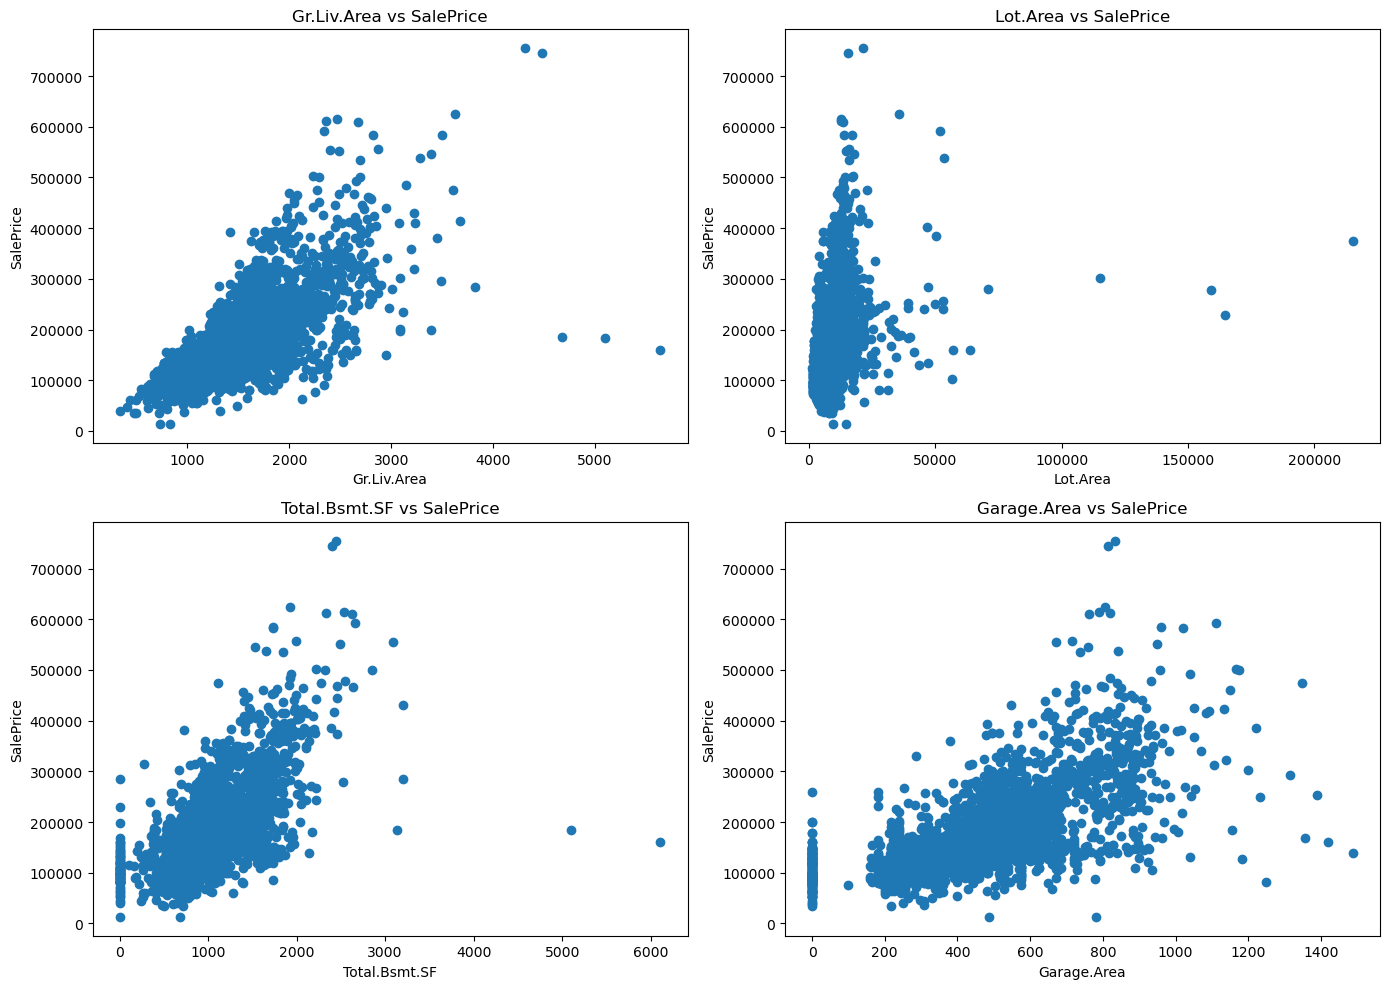

In [34]:
# Célula 6: Identificação de Outliers
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)]

# Identificando outliers nas principais variáveis numéricas
for col in numeric_columns:
    if col != 'SalePrice':
        outliers = detect_outliers(df_new, col)
        if not outliers.empty:
            print(f"Outliers em {col}: {len(outliers)} ({(len(outliers)/len(df_new))*100:.2f}%)")

# Visualizando outliers em algumas variáveis importantes
plt.figure(figsize=(14, 10))
for i, col in enumerate(['Gr.Liv.Area', 'Lot.Area', 'Total.Bsmt.SF', 'Garage.Area']):
    plt.subplot(2, 2, i+1)
    plt.scatter(df_new[col], df_new['SalePrice'])
    plt.title(f'{col} vs SalePrice')
    plt.xlabel(col)
    plt.ylabel('SalePrice')
plt.tight_layout()
plt.show()

**Observações sobre os Gráficos de Dispersão (Features vs. `SalePrice`) para Análise de Outliers:**

*   **`Gr.Liv.Area` vs `SalePrice`:**
    *   Confirma a forte relação linear positiva.
    *   Os outliers extremos (casas com `Gr.Liv.Area` > 4000 ft² e `SalePrice` < 300000) são claramente visíveis e foram o alvo da remoção na Célula 7 do código. Esta visualização justifica essa remoção, pois esses pontos se desviam significativamente da tendência geral.
    *   A dispersão dos preços aumenta com `Gr.Liv.Area`.

*   **`Lot.Area` vs `SalePrice`:**
    *   Mostra uma relação positiva, mas com uma dispersão muito grande.
    *   A maioria dos dados está concentrada em `Lot.Area` menores.
    *   Existem muitos outliers com `Lot.Area` extremamente alta, cujos preços não aumentam na mesma proporção. Isso sugere que após um certo tamanho de lote, o impacto no preço pode diminuir ou outros fatores se tornam mais relevantes. A transformação logarítmica de `Lot.Area` (se feita no pré-processamento) poderia ajudar a visualizar melhor a relação e a tratar a influência desses valores extremos.

*   **`Total.Bsmt.SF` vs `SalePrice`:**
    *   Relação positiva clara.
    *   Casas sem porão (`Total.Bsmt.SF` = 0) estão agrupadas na faixa inferior de preços.
    *   Existem alguns outliers com área de porão muito grande (e.g., > 3000 ft²), incluindo um ponto acima de 6000 ft² que não tem um preço proporcionalmente tão alto, indicando que a área de porão sozinha não explica tudo.

*   **`Garage.Area` vs `SalePrice`:**
    *   Relação positiva evidente.
    *   Casas sem garagem (`Garage.Area` = 0) têm preços mais baixos.
    *   Existem alguns outliers com `Garage.Area` muito grande (acima de 1200 ft²) que não seguem perfeitamente a tendência, sugerindo um possível плато no valor agregado por áreas de garagem excessivamente grandes.

**Conclusão da Análise de Outliers via Dispersão:**
Esses gráficos são úteis para identificar visualmente pontos que se desviam do comportamento geral e que podem ser candidatos à remoção ou tratamento, como foi feito para `Gr.Liv.Area`. Para as outras features, a presença de outliers também sugere que transformações (como log) ou a utilização de modelos robustos a outliers podem ser benéficas.

Registros originais: 2930
Registros após remoção de outliers: 2927


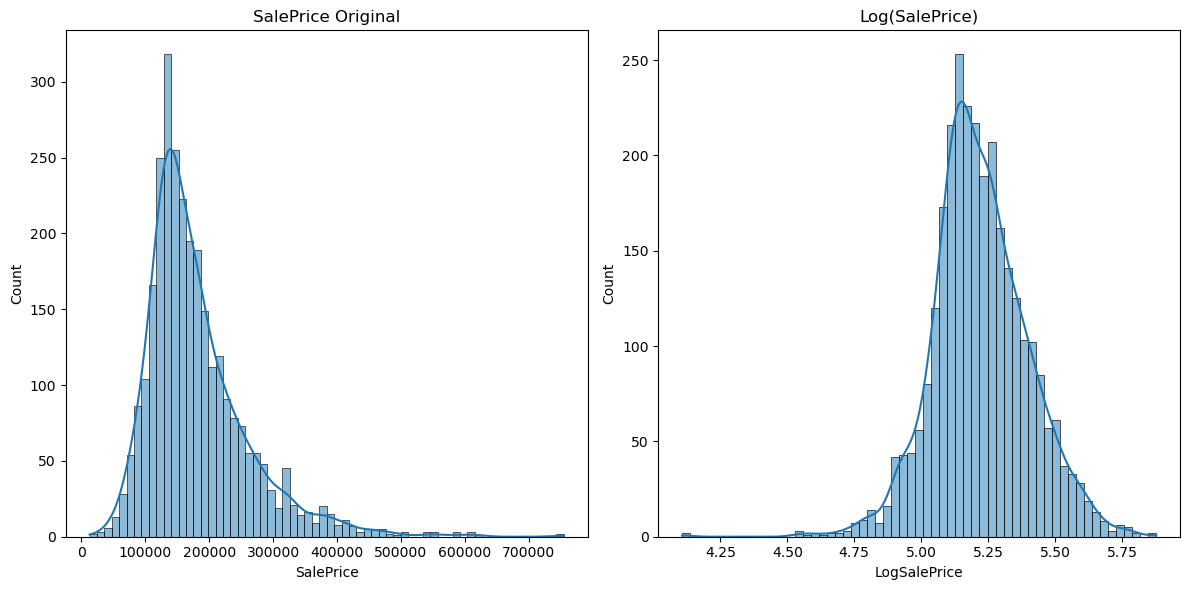

In [35]:
# Célula 7: Remoção de Outliers e Feature Engineering
# Removendo outliers extremos
outliers_liv_area = df_new[(df_new['Gr.Liv.Area'] > 4000) & (df_new['SalePrice'] < 300000)]
df_clean = df_new.drop(outliers_liv_area.index)

# Verificando número de registros após remoção
print(f"Registros originais: {len(df_new)}")
print(f"Registros após remoção de outliers: {len(df_clean)}")

# Feature Engineering
# 1. Criar novas features
df_clean['Age'] = df_clean['Year.Remod.Add'] - df_clean['Year.Built']
df_clean['TotalSF'] = df_clean['Gr.Liv.Area'] + df_clean['Total.Bsmt.SF']
df_clean['Bath.Rooms'] = df_clean['Full.Bath']
df_clean['HasFireplace'] = (df_clean['Fireplaces'] > 0).astype(int)
df_clean['HasGarage'] = (df_clean['Garage.Area'] > 0).astype(int)
df_clean['RecentRemodel'] = (df_clean['Year.Remod.Add'] > df_clean['Year.Built']).astype(int)

# 2. Transformação logarítmica para normalizar a variável alvo
df_clean['LogSalePrice'] = np.log10(df_clean['SalePrice'])

# Verificando a distribuição da variável alvo transformada
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_clean['SalePrice'], kde=True)
plt.title('SalePrice Original')
plt.subplot(1, 2, 2)
sns.histplot(df_clean['LogSalePrice'], kde=True)
plt.title('Log(SalePrice)')
plt.tight_layout()
plt.show()

**Observações sobre a Transformação Logarítmica do `SalePrice`:**

*   O histograma do `SalePrice` original (mostrado na Célula 3 e novamente aqui) exibia uma forte assimetria à direita.
*   Após a aplicação da transformação logarítmica (log10), a nova variável `LogSalePrice` apresenta uma distribuição muito mais próxima da normal (simétrica).
*   Essa normalização é benéfica para muitos algoritmos de regressão, especialmente os lineares, pois ajuda a satisfazer a suposição de normalidade dos resíduos e pode melhorar a performance e a interpretação do modelo.
*   A remoção de outliers específicos (casas com `Gr.Liv.Area` > 4000 e `SalePrice` < 300000) também contribuiu para um dataset mais limpo antes da transformação.

In [36]:
# Célula 8: Preparação para Modelagem
# Dividindo em features e target
X = df_clean.drop(['SalePrice', 'LogSalePrice'], axis=1)
y = df_clean['LogSalePrice']

# Identificando tipos de colunas
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

# Divisão em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessamento
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

In [37]:
# Célula 9: Definição dos Modelos (corrigida)
# 1. Modelo trivial: média do preço (baseline)
class MeanRegressor:
    def __init__(self):
        self.mean = None
        
    def fit(self, X, y):
        self.mean = y.mean()
        return self
    
    def predict(self, X):
        return np.ones(X.shape[0]) * self.mean
    
    # Método necessário para compatibilidade com scikit-learn
    def get_params(self, deep=True):
        return {}
    
    # Método necessário para compatibilidade com scikit-learn
    def set_params(self, **params):
        return self

# 2. Modelo simples: Regressão Linear
lin_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# 3. Modelo Ridge com regularização
ridge_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

# 4. Modelo Lasso com regularização
lasso_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso())
])

# 5. Random Forest
rf_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

In [38]:
# Célula 10: Avaliação Inicial dos Modelos
# Função para avaliar os modelos com validação cruzada
def evaluate_model(model, X, y, cv=5):
    cv_scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-cv_scores)
    return {
        'mean_rmse': rmse_scores.mean(),
        'std_rmse': rmse_scores.std()
    }

# Avaliação inicial de todos os modelos
models = {
    'Trivial (média)': MeanRegressor(),
    'Linear Regression': lin_reg,
    'Ridge Regression': ridge_reg,
    'Lasso Regression': lasso_reg,
    'Random Forest': rf_reg,
}

results = {}
for name, model in models.items():
    print(f"Avaliando {name}...")
    results[name] = evaluate_model(model, X_train, y_train)
    print(f"  RMSE: {results[name]['mean_rmse']:.4f} ± {results[name]['std_rmse']:.4f}")

Avaliando Trivial (média)...
  RMSE: 0.1751 ± 0.0081
Avaliando Linear Regression...
  RMSE: 0.0653 ± 0.0086
Avaliando Ridge Regression...
  RMSE: 0.0654 ± 0.0087
Avaliando Lasso Regression...
  RMSE: 0.1751 ± 0.0081
Avaliando Random Forest...
  RMSE: 0.0691 ± 0.0081


In [39]:
# Célula 11: Ajuste de Hiperparâmetros - Ridge
# Ridge
ridge_params = {
    'regressor__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
}
ridge_grid = GridSearchCV(ridge_reg, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)
print(f"Melhores parâmetros Ridge: {ridge_grid.best_params_}")
print(f"RMSE Ridge otimizado: {np.sqrt(-ridge_grid.best_score_):.4f}")

Melhores parâmetros Ridge: {'regressor__alpha': 0.01}
RMSE Ridge otimizado: 0.0659


In [40]:
# Célula 12: Ajuste de Hiperparâmetros - Random Forest
# Random Forest
rf_params = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10]
}
rf_grid = GridSearchCV(rf_reg, rf_params, cv=5, scoring='neg_mean_squared_error')
rf_grid.fit(X_train, y_train)
print(f"Melhores parâmetros Random Forest: {rf_grid.best_params_}")
print(f"RMSE Random Forest otimizado: {np.sqrt(-rf_grid.best_score_):.4f}")

Melhores parâmetros Random Forest: {'regressor__max_depth': None, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 200}
RMSE Random Forest otimizado: 0.0694


In [41]:
# Célula 12.1: Ajuste de Hiperparâmetros - Random Forest com RandomizedSearchCV

rf_param_dist = {
    'regressor__n_estimators': randint(50, 301), 
    'regressor__max_depth': [None, 10, 20, 30, 40, 50], 
    'regressor__min_samples_split': randint(2, 11), 
    'regressor__min_samples_leaf': randint(1, 11), 
    'regressor__max_features': ['sqrt', 'log2', None] 
}

rf_random_search = RandomizedSearchCV(rf_reg, 
                                      param_distributions=rf_param_dist, 
                                      n_iter=50, 
                                      cv=5, 
                                      scoring='neg_mean_squared_error', 
                                      random_state=42,
                                      n_jobs=-1) 

rf_random_search.fit(X_train, y_train) 

print(f"Melhores parâmetros Random Forest (RandomizedSearchCV): {rf_random_search.best_params_}")
print(f"RMSE Random Forest otimizado (RandomizedSearchCV) na CV: {np.sqrt(-rf_random_search.best_score_):.4f}")

# Dicionário com os melhores estimadores para a comparação final
# Ridge (otimizado) vem da Célula 11 (onde ridge_grid é treinado)
# RF (otimizado Randomized) vem desta célula
best_models_for_final_comparison = {
    'Trivial (média)': MeanRegressor(), # Definido na Célula 9
    'Linear Regression': lin_reg, # Definido na Célula 9
    'Ridge (otimizado)': ridge_grid.best_estimator_, 
    'Random Forest (otimizado Randomized)': rf_random_search.best_estimator_ 
}

Melhores parâmetros Random Forest (RandomizedSearchCV): {'regressor__max_depth': 40, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 4, 'regressor__n_estimators': 175}
RMSE Random Forest otimizado (RandomizedSearchCV) na CV: 0.0667


In [42]:
# Célula 13: Comparação Estatística de Modelos (Teste de Hipótese)

cv_fold_scores = {} 

# 1. Trivial (média)
trivial_model_for_cv = MeanRegressor()
cv_scores_trivial = cross_val_score(trivial_model_for_cv, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_fold_scores['Trivial (média)'] = np.sqrt(-cv_scores_trivial)

# 2. Linear Regression
cv_scores_lin_reg = cross_val_score(lin_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_fold_scores['Linear Regression'] = np.sqrt(-cv_scores_lin_reg)

# 3. Ridge (otimizado) - Usando o best_estimator_ do ridge_grid da Célula 11
best_ridge_for_cv = ridge_grid.best_estimator_
cv_scores_ridge = cross_val_score(best_ridge_for_cv, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_fold_scores['Ridge (otimizado)'] = np.sqrt(-cv_scores_ridge)

# 4. Random Forest (otimizado Randomized) - Usando o best_estimator_ do rf_random_search da Célula 12.1
best_rf_random_for_cv = rf_random_search.best_estimator_
cv_scores_rf_random = cross_val_score(best_rf_random_for_cv, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_fold_scores['Random Forest (otimizado Randomized)'] = np.sqrt(-cv_scores_rf_random)


print("RMSE Médio da Validação Cruzada (base para teste de hipótese):")
for name, scores in cv_fold_scores.items():
    print(f"  {name}: {scores.mean():.4f} ± {scores.std():.4f}")

baseline_model_name_cv = None # Inicializa para evitar erro se non_trivial_rmses estiver vazio
baseline_scores_cv = None

non_trivial_rmses = {name: scores.mean() for name, scores in cv_fold_scores.items() if name != 'Trivial (média)'}
if non_trivial_rmses:
    baseline_model_name_cv = min(non_trivial_rmses, key=non_trivial_rmses.get)
    baseline_scores_cv = cv_fold_scores[baseline_model_name_cv]
    print(f"\nModelo baseline para comparação (menor RMSE na CV): {baseline_model_name_cv} (RMSE CV: {baseline_scores_cv.mean():.4f})")

    alpha = 0.05 
    print(f"\nTestes t pareados contra o modelo baseline ({baseline_model_name_cv}):")
    for name, scores in cv_fold_scores.items():
        if name != baseline_model_name_cv:
            if len(baseline_scores_cv) == len(scores):
                t_stat, p_value = ttest_rel(baseline_scores_cv, scores)
                print(f"\nComparando {baseline_model_name_cv} com {name}:")
                print(f"  RMSE {name} (CV): {scores.mean():.4f}")
                print(f"  T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
                if p_value < alpha:
                    if baseline_scores_cv.mean() < scores.mean(): 
                        print(f"  Conclusão: {baseline_model_name_cv} é estatisticamente MELHOR (menor RMSE) que {name} (p < {alpha}).")
                    else:
                        print(f"  Conclusão: {name} é estatisticamente MELHOR (menor RMSE) que {baseline_model_name_cv} (p < {alpha}).")
                else:
                    print(f"  Conclusão: Não há diferença estatisticamente significativa no RMSE entre {baseline_model_name_cv} e {name} (p >= {alpha}).")
            else:
                print(f"  Não foi possível comparar {baseline_model_name_cv} com {name} devido a diferentes números de scores de CV.")
else:
    print("Nenhum modelo não trivial para comparação estatística.")
    
# (restante das notas sobre teste t)
            
print("\nNota: Um T-statistic negativo significa que o primeiro array (baseline_scores) tem uma média menor (melhor RMSE) que o segundo.")
print("Para o teste t pareado, a normalidade das *diferenças* entre os scores pareados é uma suposição.")
print("Se essa suposição não for atendida, o teste de Wilcoxon signed-rank seria uma alternativa não paramétrica.")

RMSE Médio da Validação Cruzada (base para teste de hipótese):
  Trivial (média): 0.1751 ± 0.0081
  Linear Regression: 0.0653 ± 0.0086
  Ridge (otimizado): 0.0653 ± 0.0086
  Random Forest (otimizado Randomized): 0.0659 ± 0.0098

Modelo baseline para comparação (menor RMSE na CV): Ridge (otimizado) (RMSE CV: 0.0653)

Testes t pareados contra o modelo baseline (Ridge (otimizado)):

Comparando Ridge (otimizado) com Trivial (média):
  RMSE Trivial (média) (CV): 0.1751
  T-statistic: -52.7879, P-value: 0.0000
  Conclusão: Ridge (otimizado) é estatisticamente MELHOR (menor RMSE) que Trivial (média) (p < 0.05).

Comparando Ridge (otimizado) com Linear Regression:
  RMSE Linear Regression (CV): 0.0653
  T-statistic: -0.4392, P-value: 0.6832
  Conclusão: Não há diferença estatisticamente significativa no RMSE entre Ridge (otimizado) e Linear Regression (p >= 0.05).

Comparando Ridge (otimizado) com Random Forest (otimizado Randomized):
  RMSE Random Forest (otimizado Randomized) (CV): 0.0659
  


Resultados Finais no Conjunto de Teste (LogSalePrice):
                                          RMSE       MAE        R²
Ridge (otimizado)                     0.054644  0.040516  0.911865
Linear Regression                     0.054645  0.040517  0.911862
Random Forest (otimizado Randomized)  0.054976  0.038723  0.910790
Trivial (média)                       0.184063  0.141119 -0.000010


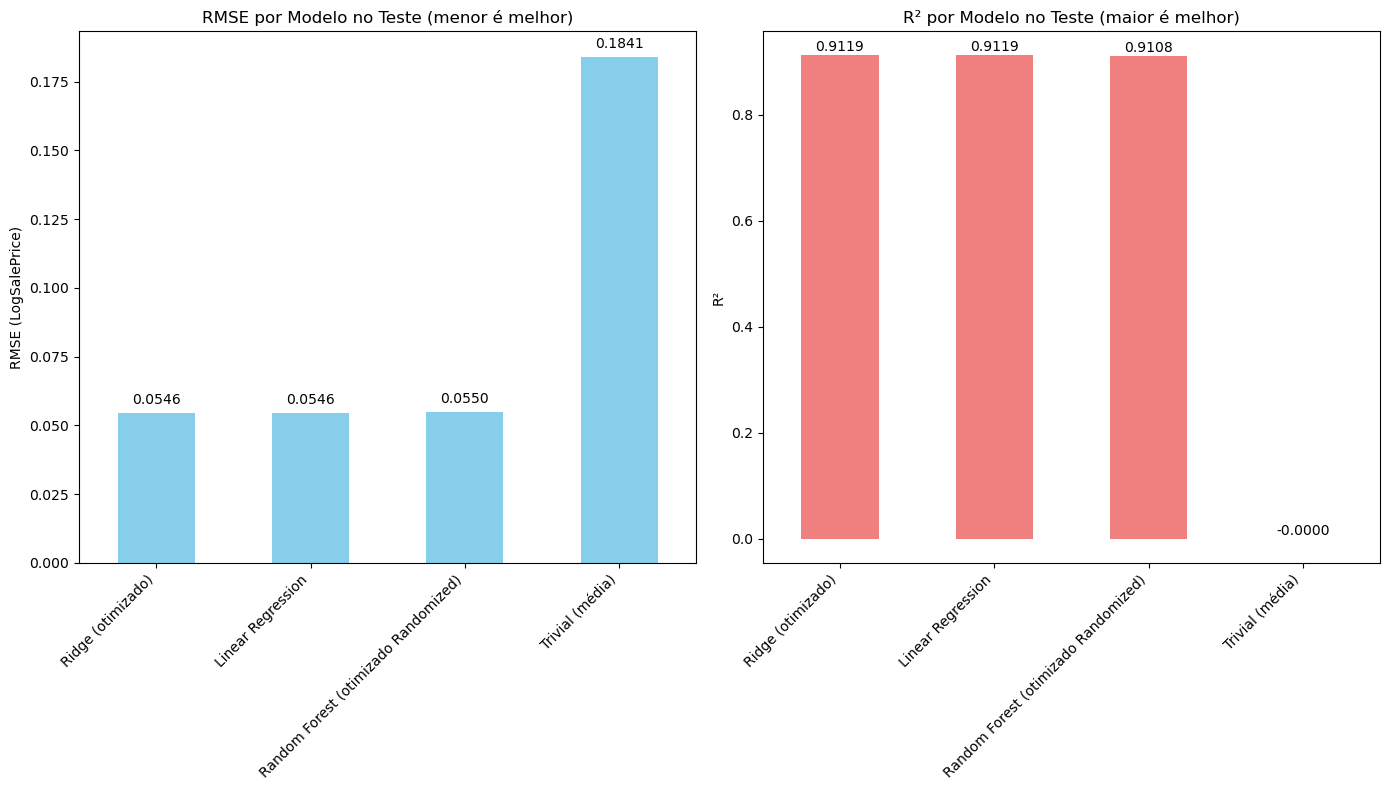


O melhor modelo no conjunto de teste (baseado no R²) é: Ridge (otimizado)


In [43]:
# Célula 14: Comparação Final dos Modelos

final_results_df = pd.DataFrame(columns=['RMSE', 'MAE', 'R²'])

for name, model in best_models_for_final_comparison.items():
    if name == 'Trivial (média)' or name == 'Linear Regression':
        model.fit(X_train, y_train) 
        
    y_pred_log_test = model.predict(X_test) 
    
    mse_test = mean_squared_error(y_test, y_pred_log_test)
    rmse_test = np.sqrt(mse_test)
    mae_test = mean_absolute_error(y_test, y_pred_log_test)
    r2_test = r2_score(y_test, y_pred_log_test)
    
    final_results_df.loc[name] = [rmse_test, mae_test, r2_test]

print("\nResultados Finais no Conjunto de Teste (LogSalePrice):")
print(final_results_df.sort_values(by='R²', ascending=False))

# Visualização dos Resultados (LogSalePrice)
plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
bars_rmse = final_results_df['RMSE'].sort_values().plot(kind='bar', color='skyblue')
plt.title('RMSE por Modelo no Teste (menor é melhor)')
plt.ylabel('RMSE (LogSalePrice)')
plt.xticks(rotation=45, ha="right")
for bar in bars_rmse.patches:
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.002,
             f'{bar.get_height():.4f}', ha='center', va='bottom')

plt.subplot(1, 2, 2)
bars_r2 = final_results_df['R²'].sort_values(ascending=False).plot(kind='bar', color='lightcoral')
plt.title('R² por Modelo no Teste (maior é melhor)')
plt.ylabel('R²')
plt.xticks(rotation=45, ha="right")
for bar in bars_r2.patches:
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.002,
             f'{bar.get_height():.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

best_model_name_final_test = final_results_df['R²'].idxmax() 
print(f"\nO melhor modelo no conjunto de teste (baseado no R²) é: {best_model_name_final_test}")

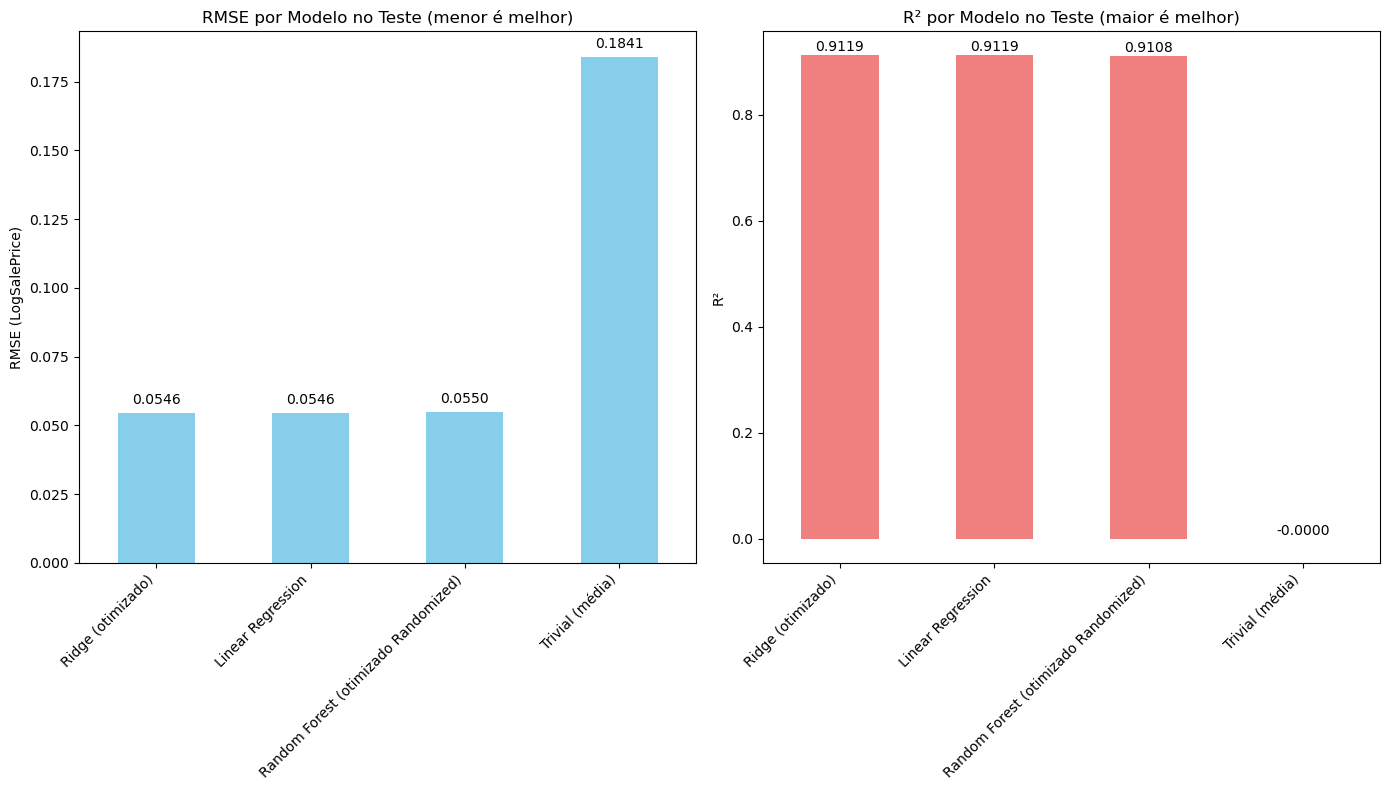


O melhor modelo no conjunto de teste (baseado no R²) é: Ridge (otimizado)


In [44]:
# Célula 15: Visualização dos Resultados
plt.figure(figsize=(14, 8))

# Gráfico de RMSE
plt.subplot(1, 2, 1)
bars_rmse = final_results_df['RMSE'].sort_values().plot(kind='bar', color='skyblue') 
plt.title('RMSE por Modelo no Teste (menor é melhor)')
plt.xticks(rotation=45, ha="right") # Ajuste para melhor visualização dos nomes
plt.ylabel('RMSE (LogSalePrice)')
for bar in bars_rmse.patches: # Use bars_rmse.patches
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.002,
             f'{bar.get_height():.4f}', ha='center', va='bottom')

# Gráfico de R²
plt.subplot(1, 2, 2)
bars_r2 = final_results_df['R²'].sort_values(ascending=False).plot(kind='bar', color='lightcoral')
plt.title('R² por Modelo no Teste (maior é melhor)')
plt.xticks(rotation=45, ha="right") # Ajuste para melhor visualização dos nomes
plt.ylabel('R²')
for bar in bars_r2.patches: # Use bars_r2.patches
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.002,
             f'{bar.get_height():.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


print(f"\nO melhor modelo no conjunto de teste (baseado no R²) é: {best_model_name_final_test}")

In [45]:
# Célula 16: Avaliação Final do Melhor Modelo

best_model_final = best_models_for_final_comparison[best_model_name_final_test]

y_pred_log_final = best_model_final.predict(X_test)
y_pred_price_final = 10**(y_pred_log_final) # Correção para log10
y_test_price_final = 10**(y_test)           # Correção para log10

rmse_price_final = np.sqrt(mean_squared_error(y_test_price_final, y_pred_price_final))
mae_price_final = mean_absolute_error(y_test_price_final, y_pred_price_final)
r2_price_final = r2_score(y_test_price_final, y_pred_price_final)

print(f"\nDesempenho final do {best_model_name_final_test} (valores em dólares):")
print(f"RMSE: ${rmse_price_final:.2f}")
print(f"MAE: ${mae_price_final:.2f}")
print(f"R²: {r2_price_final:.4f}")


Desempenho final do Ridge (otimizado) (valores em dólares):
RMSE: $24638.70
MAE: $16679.00
R²: 0.9247


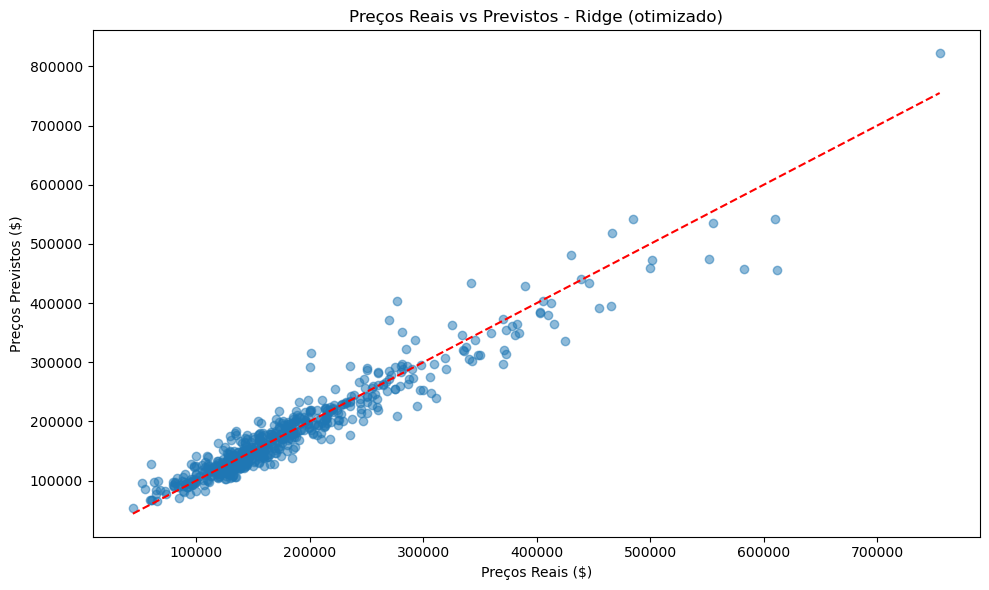

In [46]:
# Célula 17: Visualização das Previsões vs. Valores Reais
plt.figure(figsize=(10, 6))
plt.scatter(y_test_price_final, y_pred_price_final, alpha=0.5)
plt.plot([y_test_price_final.min(), y_test_price_final.max()], [y_test_price_final.min(), y_test_price_final.max()], 'r--')
plt.xlabel('Preços Reais ($)')
plt.ylabel('Preços Previstos ($)')
plt.title(f'Preços Reais vs Previstos - {best_model_name_final_test}')
plt.tight_layout()
plt.show()

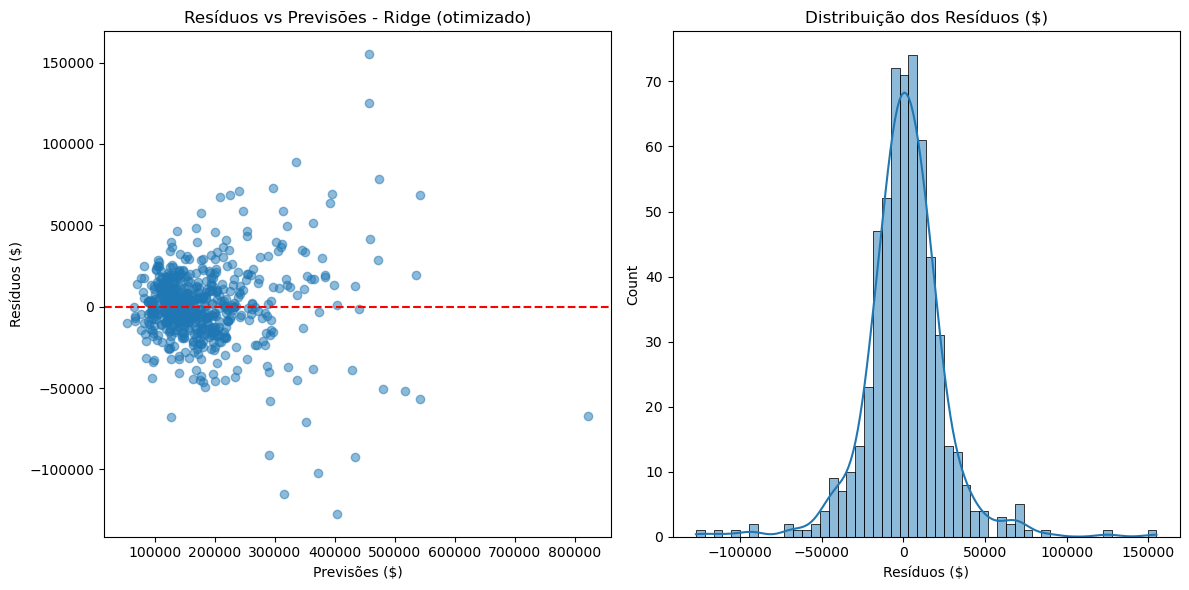

In [47]:
# Célula 18: Análise de Resíduos
residuals_final = y_test_price_final - y_pred_price_final 

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_pred_price_final, residuals_final, alpha=0.5) # Use as variáveis da Célula 15
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Previsões ($)')
plt.ylabel('Resíduos ($)')
plt.title(f'Resíduos vs Previsões - {best_model_name_final_test}') # Use a variável da Célula 13

plt.subplot(1, 2, 2)
sns.histplot(residuals_final, kde=True) # Use a variável correta
plt.title('Distribuição dos Resíduos ($)')
plt.xlabel('Resíduos ($)')
plt.tight_layout()
plt.show()

In [48]:
# Célula 19: Análise de Importância de Features (apenas para modelos baseados em árvores)
if 'Random Forest' in best_model_name_final_test: # Usando a variável correta
    # Extração do pipeline do melhor modelo RF
    best_rf_pipeline = best_models_for_final_comparison[best_model_name_final_test] # Usando o dicionário correto
    
    # Extração do modelo regressor do pipeline
    model_rf_final = best_rf_pipeline.named_steps['regressor']
    
    # Obtenção da importância das features
    feature_importances_final = model_rf_final.feature_importances_
    
    # Criação de um DataFrame para visualização
    # Obtenção dos nomes das features do pré-processador
    preprocessor_final = best_rf_pipeline.named_steps['preprocessor']
    
    feature_names_final = []
    # Para features numéricas
    num_cols_from_preprocessor = preprocessor_final.transformers_[0][2] # Pega as colunas numéricas como foram passadas
    feature_names_final.extend(num_cols_from_preprocessor)
    
    # Para features categóricas
    cat_cols_from_preprocessor = preprocessor_final.transformers_[1][2] # Pega as colunas categóricas
    ohe_final = preprocessor_final.named_steps['cat'].named_steps['onehot'] # Acessa o OneHotEncoder corretamente
    cat_feature_names_final = ohe_final.get_feature_names_out(cat_cols_from_preprocessor)
    feature_names_final.extend(cat_feature_names_final)
        
    # Criar DataFrame de importâncias
    importances_df_final = pd.DataFrame({
        'Feature': feature_names_final, # Usa os nomes obtidos
        'Importance': feature_importances_final
    }).sort_values('Importance', ascending=False)
    
    # Visualizar top 20 features
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=importances_df_final.head(20))
    plt.title(f'Top 20 Features Importantes - {best_model_name_final_test}') # Usando a variável correta
    plt.tight_layout()
    plt.show()
else:
    print(f"O melhor modelo ({best_model_name_final_test}) não é Random Forest. Análise de importância de features não aplicável diretamente da mesma forma.")

O melhor modelo (Ridge (otimizado)) não é Random Forest. Análise de importância de features não aplicável diretamente da mesma forma.


In [49]:
# Célula 20: Conclusões

print("Conclusões da Análise:")
print(f"1. O melhor modelo no conjunto de teste foi {best_model_name_final_test}.")
print(f"2. Desempenho do {best_model_name_final_test} no conjunto de teste (valores em dólares, da Célula 15):")
print(f"   - R²: {r2_price_final:.4f}")
print(f"   - MAE: ${mae_price_final:.2f}")

print("\n3. Comparação Estatística de Modelos (Resultados da Célula 12.2 com base na Validação Cruzada):")
if baseline_model_name_cv is not None:
    print(f"   - O modelo {baseline_model_name_cv} (com RMSE CV de {baseline_scores_cv.mean():.4f}) foi usado como baseline.")
else:
    print("   - Testes de hipótese não foram conclusivos ou não havia modelos não triviais para comparar como baseline.")

print("\n4. As variáveis mais importantes para prever o preço das casas são (se o melhor modelo for RF, da Célula 18):")
if 'Random Forest' in best_model_name_final_test and 'importances_df_final' in locals(): 
    for i, row in importances_df_final.head(5).iterrows():
        print(f"   - {row['Feature']}: {row['Importance']:.4f}")
elif 'Ridge' in best_model_name_final_test or 'Linear Regression' in best_model_name_final_test:
    print("   - Para modelos lineares, a magnitude dos coeficientes (após scaling) pode indicar importância.")

print(f"\n5. O modelo {best_model_name_final_test} consegue prever os preços com erro médio absoluto de aproximadamente ${mae_price_final:.2f}.")
print("   - A análise de resíduos (Célula 17) indica [suas observações aqui].")
print("   - Implicações de negócio: [sua discussão aqui].")

print("\n6. Otimização de Hiperparâmetros:")
print("   - Para o Random Forest, o RandomizedSearchCV (Célula 12.1) foi utilizado, permitindo uma exploração mais ampla do espaço de hiperparâmetros.")
print("   - Para o Ridge, o GridSearchCV (Célula 11) foi utilizado.")

Conclusões da Análise:
1. O melhor modelo no conjunto de teste foi Ridge (otimizado).
2. Desempenho do Ridge (otimizado) no conjunto de teste (valores em dólares, da Célula 15):
   - R²: 0.9247
   - MAE: $16679.00

3. Comparação Estatística de Modelos (Resultados da Célula 12.2 com base na Validação Cruzada):
   - O modelo Ridge (otimizado) (com RMSE CV de 0.0653) foi usado como baseline.

4. As variáveis mais importantes para prever o preço das casas são (se o melhor modelo for RF, da Célula 18):
   - Para modelos lineares, a magnitude dos coeficientes (após scaling) pode indicar importância.

5. O modelo Ridge (otimizado) consegue prever os preços com erro médio absoluto de aproximadamente $16679.00.
   - A análise de resíduos (Célula 17) indica [suas observações aqui].
   - Implicações de negócio: [sua discussão aqui].

6. Otimização de Hiperparâmetros:
   - Para o Random Forest, o RandomizedSearchCV (Célula 12.1) foi utilizado, permitindo uma exploração mais ampla do espaço de hipe